The purpose of this analysis is to explore the Bike ride data and answer few questions :  
Can we understand the bike ridership dynamics over the years i.e   
how many trips between stations ?    
Whats the total duration of the trips between stations ?  
Which stations have the maximum number of trips by the years?   
Can we see the hourly availability of bikes ??  etc 
We intend to plot the network graph of the bike ride data so that we can visualize the trips between stations and understand the interconnections between the trips.   

Data source : https://www.kaggle.com/benhamner/sf-bay-area-bike-share/version/2

In [68]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
station = pd.read_csv('station.csv')
status = pd.read_csv('status.csv')
trip = pd.read_csv('trip.csv')
weather = pd.read_csv('weather.csv')

In [4]:
def get_file_details(file):
    
    print(file.info())
    print("Records :\n")
    print(file.head())
    print(" Summary Stats: \n")
    print(file.describe())

In [5]:
get_file_details(station)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70 non-null     int64  
 1   name               70 non-null     object 
 2   lat                70 non-null     float64
 3   long               70 non-null     float64
 4   dock_count         70 non-null     int64  
 5   city               70 non-null     object 
 6   installation_date  70 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ KB
None
Records :

   id                               name        lat        long  dock_count  \
0   2  San Jose Diridon Caltrain Station  37.329732 -121.901782          27   
1   3              San Jose Civic Center  37.330698 -121.888979          15   
2   4             Santa Clara at Almaden  37.333988 -121.894902          11   
3   5                   Adobe on Almaden  37.331415 -121.893200         

In [6]:
get_file_details(status)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984434 entries, 0 to 71984433
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   station_id       int64 
 1   bikes_available  int64 
 2   docks_available  int64 
 3   time             object
dtypes: int64(3), object(1)
memory usage: 2.1+ GB
None
Records :

   station_id  bikes_available  docks_available                 time
0           2                2               25  2013/08/29 12:06:01
1           2                2               25  2013/08/29 12:07:01
2           2                2               25  2013/08/29 12:08:01
3           2                2               25  2013/08/29 12:09:01
4           2                2               25  2013/08/29 12:10:01
 Summary Stats: 

         station_id  bikes_available  docks_available
count  7.198443e+07     7.198443e+07     7.198443e+07
mean   4.253149e+01     8.394812e+00     9.284729e+00
std    2.376117e+01     3.993586e+00     4.175442e+0

In [7]:
## Which time of the day , day of the week , do you have maximum and minimum bikes available ? And how many ?
## Which are the top 3 stations for the above? 

In [7]:
get_file_details(trip)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  669959 non-null  int64 
 1   duration            669959 non-null  int64 
 2   start_date          669959 non-null  object
 3   start_station_name  669959 non-null  object
 4   start_station_id    669959 non-null  int64 
 5   end_date            669959 non-null  object
 6   end_station_name    669959 non-null  object
 7   end_station_id      669959 non-null  int64 
 8   bike_id             669959 non-null  int64 
 9   subscription_type   669959 non-null  object
 10  zip_code            663340 non-null  object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB
None
Records :

     id  duration       start_date        start_station_name  \
0  4576        63  8/29/2013 14:13  South Van Ness at Market   
1  4607        70  8/29/2013 14:42        San Jose City H

In [9]:
## Which route has the maximum and least bikers ?
## Whats the maximum and minimum duration ? 

In [8]:
get_file_details(weather)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            3665 non-null   object 
 1   max_temperature_f               3661 non-null   float64
 2   mean_temperature_f              3661 non-null   float64
 3   min_temperature_f               3661 non-null   float64
 4   max_dew_point_f                 3611 non-null   float64
 5   mean_dew_point_f                3611 non-null   float64
 6   min_dew_point_f                 3611 non-null   float64
 7   max_humidity                    3611 non-null   float64
 8   mean_humidity                   3611 non-null   float64
 9   min_humidity                    3611 non-null   float64
 10  max_sea_level_pressure_inches   3664 non-null   float64
 11  mean_sea_level_pressure_inches  3664 non-null   float64
 12  min_sea_level_pressure_inches   36

In [9]:
status['Date'] = pd.to_datetime(status['time'])
status.head()

,station_id,bikes_available,docks_available,time,Date
0,2,2,25,2013/08/29 12:06:01,2013-08-29 12:06:01
1,2,2,25,2013/08/29 12:07:01,2013-08-29 12:07:01
2,2,2,25,2013/08/29 12:08:01,2013-08-29 12:08:01
3,2,2,25,2013/08/29 12:09:01,2013-08-29 12:09:01
4,2,2,25,2013/08/29 12:10:01,2013-08-29 12:10:01


In [10]:
status['date'] = status['Date'].dt.date

In [11]:
status['hour'] = status['Date'].dt.hour 

In [12]:
status['Date'].max() , status['Date'].min()

(Timestamp('2015-08-31 23:59:02'), Timestamp('2013-08-29 12:06:01'))

In [13]:
hourly_bikes_available = status.groupby(['station_id','date','hour'])['bikes_available'].sum()

In [14]:
hourly_bikes_available = hourly_bikes_available.reset_index()
hourly_bikes_available

,station_id,date,hour,bikes_available
0,2,2013-08-29,12,96
1,2,2013-08-29,13,143
2,2,2013-08-29,14,112
3,2,2013-08-29,15,108
4,2,2013-08-29,16,110
...,...,...,...,...
1204829,84,2015-08-31,19,480
1204830,84,2015-08-31,20,480
1204831,84,2015-08-31,21,480
1204832,84,2015-08-31,22,480


Save the file to avoid rerunning the logic.   

In [18]:
hourly_bikes_available.to_csv("bikes_available_hourly.csv", index = False)

In [27]:
hourly_bikes_available.describe()

,station_id,hour,bikes_available
count,1.204834e+06,1.204834e+06,1.204834e+06
mean,4.252662e+01,1.150585e+01,5.015594e+02
std,2.375881e+01,6.921211e+00,2.358791e+02
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,2.400000e+01,6.000000e+00,3.550000e+02
50%,4.200000e+01,1.200000e+01,4.800000e+02
75%,6.300000e+01,1.800000e+01,6.280000e+02
max,8.400000e+01,2.300000e+01,1.620000e+03


Text(0.5, 1.0, ' Distrbution of Hourly Bikes available  ')

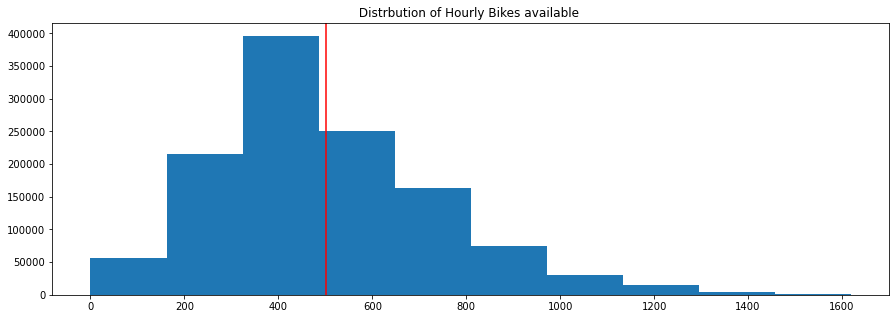

In [34]:
plt.figure(figsize = (15,5))
plt.hist(hourly_bikes_available['bikes_available'])
plt.axvline(hourly_bikes_available['bikes_available'].mean(), color = 'red')
plt.title(" Distrbution of Hourly Bikes available  ")

In [15]:
hourly_bikes_available['year'] = pd.to_datetime(hourly_bikes_available['date']).dt.year 

In [16]:
year_hour_bike_available = hourly_bikes_available.groupby(['year', 'hour'])['bikes_available'].sum().reset_index()
year_hour_bike_available

,year,hour,bikes_available
0,2013,0,4206948
1,2013,1,4159221
2,2013,2,4218619
3,2013,3,4222449
4,2013,4,4222427
...,...,...,...
67,2015,19,8135061
68,2015,20,8304191
69,2015,21,8390024
70,2015,22,8426939


Text(0.5, 1.0, 'Bikes Available')

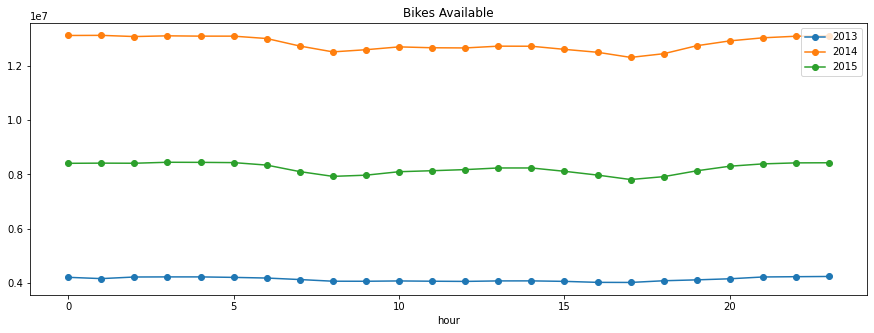

In [48]:
plt.figure(figsize = (15,5))
year_hour_bike_available[year_hour_bike_available['year'] == 2013].set_index(['hour'])['bikes_available'].plot(style = '-o', label = '2013')
year_hour_bike_available[year_hour_bike_available['year'] == 2014].set_index(['hour'])['bikes_available'].plot(style = '-o',label = '2014')
year_hour_bike_available[year_hour_bike_available['year'] == 2015].set_index(['hour'])['bikes_available'].plot(style = '-o',label = '2015')
plt.legend()
plt.title("Bikes Available")

In the year 2013 , there were half available bikes as they were in 2015. The year 2014 has the maximum number of available bikes.  
In the line graph above , we can see a dip in the lines around 8am and then again during 17pm, signifying the maximum usage of bikes during those hours.  

In [20]:
hourly_bikes_available[hourly_bikes_available['bikes_available'] == hourly_bikes_available['bikes_available'].max()]

,station_id,date,hour,bikes_available
866326,61,2015-03-13,4,1620
868737,61,2015-06-21,19,1620
960265,67,2013-12-02,13,1620
960266,67,2013-12-02,14,1620
1143924,77,2014-11-22,1,1620
1143925,77,2014-11-22,2,1620
1143926,77,2014-11-22,3,1620
1143928,77,2014-11-22,5,1620
1143930,77,2014-11-22,7,1620
1143931,77,2014-11-22,8,1620


In [23]:
station[(station['id'] == 61) | (station['id'] == 67) | (station['id'] == 77)]

,id,name,lat,long,dock_count,city,installation_date
49,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,8/22/2013
55,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013


Stations 61 , 67 and 77 shown above have the maximum bikes available.  
The hour when the maximum bikes are available is from 1, 2 to 8 am in the morning.  
Station 61 has the maximum bikes available at 7pm. The location of the  station would be the reason for less usage of bikes or more bike availability.    

Mimumum bikes available

In [30]:
hourly_bikes_available[hourly_bikes_available['bikes_available'] ==0]['station_id'].value_counts()

76    233
45    196
48    143
10    129
60    120
     ... 
70      3
24      3
23      2
16      1
30      1
Name: station_id, Length: 63, dtype: int64

In [33]:
hourly_bikes_available[hourly_bikes_available['bikes_available'] ==0]['hour'].value_counts()

3     248
2     241
4     237
1     236
5     234
0     203
6     176
23    161
18    108
22    104
10    100
14     85
19     82
7      75
9      62
20     57
11     50
21     50
13     48
17     45
15     43
12     41
16     37
8      34
Name: hour, dtype: int64

In [31]:
station[(station['id'] == 76) | (station['id'] == 45) | (station['id'] == 48)]

,id,name,lat,long,dock_count,city,installation_date
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,8/19/2013
37,48,Embarcadero at Vallejo,37.799953,-122.398525,15,San Francisco,8/19/2013
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013


Stations 76 , 45 and 48 as  shown above are among those stations that have zero availability of bikes , indicating maximum users taking the rides.  
The hour when zero bikes are available is the evry early morning hours as well as in the evening hours 6 , 7 .    


In [34]:
trip['start_date'] = pd.to_datetime(trip['start_date'])
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [35]:
trip['end_date'] = pd.to_datetime(trip['end_date'])
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [36]:
trip['year'] = trip['start_date'].dt.year
trip['month'] = trip['start_date'].dt.month
trip['day'] = trip['start_date'].dt.day
trip['hour'] = trip['start_date'].dt.hour

In [37]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,year,month,day,hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013,8,29,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013,8,29,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013,8,29,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013,8,29,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013,8,29,12


In [38]:
no_of_trips = trip.groupby(['start_station_id','end_station_id' ])['id'].count().reset_index()
no_of_trips.rename(columns = {"id" : 'n_trips'} , inplace = True)
no_of_trips

,start_station_id,end_station_id,n_trips
0,2,2,191
1,2,3,448
2,2,4,2200
3,2,5,627
4,2,6,1274
...,...,...,...
1746,84,13,15
1747,84,14,32
1748,84,16,5
1749,84,80,427


In [39]:
durations = trip.groupby(['start_station_id','end_station_id' ])['duration'].sum().reset_index()
durations

,start_station_id,end_station_id,duration
0,2,2,1724363
1,2,3,258472
2,2,4,638922
3,2,5,365842
4,2,6,570710
...,...,...,...
1746,84,13,8675
1747,84,14,25509
1748,84,16,4886
1749,84,80,221465


Combine the two files.  

In [40]:
trip_summary = no_of_trips.set_index(['start_station_id', 'end_station_id']).merge(durations.set_index(['start_station_id', 'end_station_id']), left_index = True, right_index = True)
trip_summary.reset_index(inplace = True)
trip_summary

,start_station_id,end_station_id,n_trips,duration
0,2,2,191,1724363
1,2,3,448,258472
2,2,4,2200,638922
3,2,5,627,365842
4,2,6,1274,570710
...,...,...,...,...
1746,84,13,15,8675
1747,84,14,32,25509
1748,84,16,5,4886
1749,84,80,427,221465


Correlation between No_of_trips and total duration.  

Text(0, 0.5, 'Total duration')

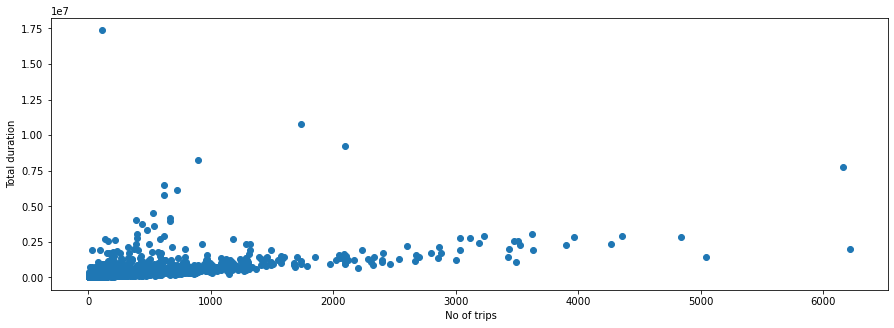

In [66]:
plt.figure(figsize = (15,5))
plt.scatter(trip_summary['n_trips'] , trip_summary['duration'])
plt.xlabel(" No of trips")
plt.ylabel("Total duration")

In [100]:
## save the file 
trip_summary.to_csv("trip_summary.csv", index = False)

In [41]:
trip_summary[trip_summary['n_trips']== trip_summary['n_trips'].max()]

,start_station_id,end_station_id,n_trips,duration
1377,69,65,6216,1972347


In [42]:
station[(station['id'] == 69) | (station['id'] == 65) ]

,id,name,lat,long,dock_count,city,installation_date
53,65,Townsend at 7th,37.771058,-122.402717,15,San Francisco,8/22/2013
57,69,San Francisco Caltrain 2 (330 Townsend),37.776600,-122.395470,23,San Francisco,8/23/2013


Station Id 69- Townsend at 7th  to Station Id  65- San Francisco Caltrain 2 (330 Townsend) has the maximum number of trips.  


Distribution of number of trips between stations.  

Text(0.5, 1.0, ' Distrbution of number of trips between stations  ')

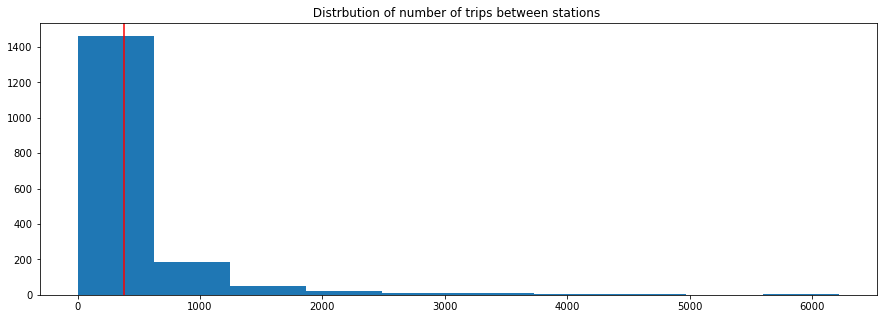

In [43]:
plt.figure(figsize = (15,5))
plt.hist(trip_summary['n_trips'])
plt.axvline(trip_summary['n_trips'].mean(), color = 'red')
plt.title(" Distrbution of number of trips between stations  ")

the total trips between stations is positively skewed.  Mean number of total trips is @500.  

Distribution of trip duration between stations.  

Text(0.5, 1.0, ' Distrbution of trip duration  between stations  ')

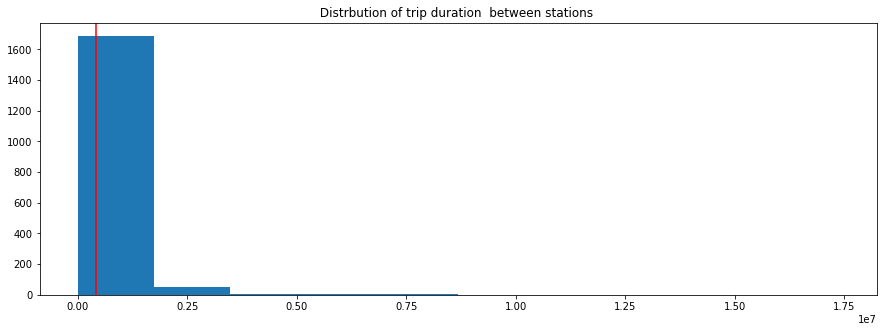

In [44]:
plt.figure(figsize = (15,5))
plt.hist(trip_summary['duration'])
plt.axvline(trip_summary['duration'].mean(), color = 'red')
plt.title(" Distrbution of trip duration  between stations  ")

The total trip duration is positively skewed. Mean is @ 5000000.  

In [45]:
## total trips between stations by the year 
yr_no_of_trips = trip.groupby(['year', 'start_station_id','end_station_id' ])['id'].count().reset_index()
yr_no_of_trips.rename(columns = {"id" : 'n_trips'} , inplace = True)
yr_no_of_trips

,year,start_station_id,end_station_id,n_trips
0,2013,2,2,46
1,2013,2,3,41
2,2013,2,4,269
3,2013,2,5,114
4,2013,2,6,209
...,...,...,...,...
4865,2015,84,12,5
4866,2015,84,13,8
4867,2015,84,14,20
4868,2015,84,80,131


In [51]:
max_2013 = yr_no_of_trips[yr_no_of_trips['year'] == 2013]['n_trips'].max()
yr_no_of_trips[(yr_no_of_trips['year'] == 2013) & (yr_no_of_trips['n_trips'] == max_2013)]

,year,start_station_id,end_station_id,n_trips
618,2013,50,60,945


In [52]:
max_2014 = yr_no_of_trips[yr_no_of_trips['year'] == 2014]['n_trips'].max()
yr_no_of_trips[(yr_no_of_trips['year'] == 2014) & (yr_no_of_trips['n_trips'] == max_2014)]

,year,start_station_id,end_station_id,n_trips
2685,2014,65,70,3158


In [53]:
max_2015 = yr_no_of_trips[yr_no_of_trips['year'] == 2015]['n_trips'].max()
yr_no_of_trips[(yr_no_of_trips['year'] == 2015) & (yr_no_of_trips['n_trips'] == max_2015)]

,year,start_station_id,end_station_id,n_trips
4506,2015,69,65,2563


Its seen above that the stations that give  the max no of trips vary every year.        

Duration.  

In [55]:
yr_durations = trip.groupby(['year','start_station_id','end_station_id' ])['duration'].sum().reset_index()
yr_durations

,year,start_station_id,end_station_id,duration
0,2013,2,2,103100
1,2013,2,3,34023
2,2013,2,4,81267
3,2013,2,5,70162
4,2013,2,6,95760
...,...,...,...,...
4865,2015,84,12,3895
4866,2015,84,13,5107
4867,2015,84,14,13665
4868,2015,84,80,62735


In [57]:
max_dur_2013 = yr_durations[yr_durations['year'] == 2013]['duration'].max()
yr_durations[(yr_durations['year'] == 2013) & (yr_durations['duration'] == max_dur_2013)]

,year,start_station_id,end_station_id,duration
610,2013,50,50,3073739


In [58]:
max_dur_2014 = yr_durations[yr_durations['year'] == 2014]['duration'].max()
yr_durations[(yr_durations['year'] == 2014) & (yr_durations['duration'] == max_dur_2014)]

,year,start_station_id,end_station_id,duration
2713,2014,66,62,17324440


In [59]:
max_dur_2015 = yr_durations[yr_durations['year'] == 2015]['duration'].max()
yr_durations[(yr_durations['year'] == 2015) & (yr_durations['duration'] == max_dur_2015)]

,year,start_station_id,end_station_id,duration
3897,2015,50,50,3213743


Again its seen above that every year it is a different set of stations giving the maximum duration for the year.  

Combine the two files.  

In [60]:
yr_trip_summary = yr_no_of_trips.set_index(['year','start_station_id', 'end_station_id']).merge(yr_durations.set_index(['year','start_station_id', 'end_station_id']), left_index = True, right_index = True)
yr_trip_summary.reset_index(inplace = True)
yr_trip_summary

,year,start_station_id,end_station_id,n_trips,duration
0,2013,2,2,46,103100
1,2013,2,3,41,34023
2,2013,2,4,269,81267
3,2013,2,5,114,70162
4,2013,2,6,209,95760
...,...,...,...,...,...
4865,2015,84,12,5,3895
4866,2015,84,13,8,5107
4867,2015,84,14,20,13665
4868,2015,84,80,131,62735


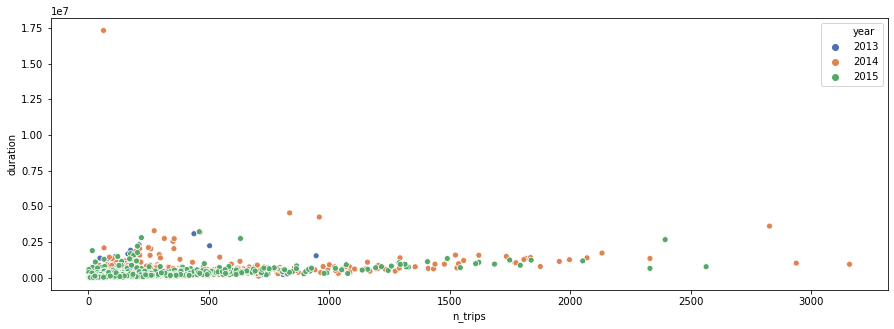

In [74]:
plt.figure(figsize = (15,5))
sns.scatterplot('n_trips', 'duration', data = yr_trip_summary , hue = 'year', palette="deep")


In [61]:
## Save the file 
yr_trip_summary.to_csv("yr_trip_summary.csv", index = False)

In [62]:
trip_graph = nx.from_pandas_edgelist(trip_summary, source='start_station_id', target='end_station_id', edge_attr=True, create_using = nx.MultiDiGraph())
##

In [63]:
# Save the  graph
with open("trip_graph.p", 'wb') as f:
    pickle.dump(trip_graph, f)